# Cards and Statistics

Project to compute statistics from card draws.

We're using a regular 52 deck of cards.

In [4]:
#Import libraries
import random as rd
import itertools
#can use numpy's built in mean(), median() and std()
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as sp
#Tells Jupyter to print results of any variable on a new line so tables will look good
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#have matplotlib output to this notebook
%matplotlib inline

Define functions

In [5]:
#input a list of cards and returns a list of only their values.
def cardval(hand):
    valhand = []
    for card in hand:
        if card[0].isalpha() and card[0]!='A':
            valhand.append(10)
        elif card[0]=='A':
            valhand.append(1)
        elif card[0]=='1':
            valhand.append(10)
        else:
            valhand.append(int(card[0]))
    return valhand
    
#drawing a number of cards from the deck without replacement    
def draw(deck,numcards=3):
    #random.sample() does sampling without replacement
    return rd.sample(deck,numcards)

#input dataframe of cards, returns dataframe of ints. relies on cardval.
def dfval(df):
    valhand = []
    #itertuples iterates over each row in the df
    for row in df.itertuples():
        #convert each row to list and slice after the index
        valhand.append(cardval(list(row)[1:]))
    
    dfvalhand = pd.DataFrame.from_records(valhand)
    return dfvalhand

#create a column for stats we want of each sample (which is a row
#so far we have mean and sum
def dfstat(df):
    df = df.assign(mean=df.mean(axis=1).round(2),sum=df.sum(axis=1))
    return df

Create the deck

In [6]:
#cards are A,2-10,J,Q,K and suits spade, heart, clubs, diamond
suits = 'cdhs'
ranks = 'A23456789TJQK'

#creating the deck as a list
deck = list(''.join(card) for card in itertools.product(ranks,suits))

**Q1. First, create a histogram depicting the relative frequencies of the card values for a single draw. Report the mean, median, and standard deviation of the value distribution**

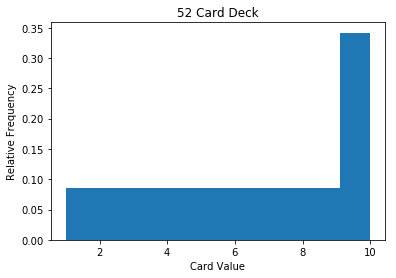

In [8]:
#Histogram of a single draw from the 52 card deck
plt.figure(1)
plt.title("52 Card Deck")
plt.xlabel("Card Value")
plt.ylabel("Relative Frequency")
#adding a semicolon to the end disables all the text output related to the plotting the histogram
plt.hist(cardval(deck),normed=True);

Mean, median and standard deviation of a single draw from the 52 card deck

In [9]:
#Rounding all to 2 decimal places
mean = round(np.mean(cardval(deck)),2)
median = round(np.median(cardval(deck)),2)
#numpy's std defaults to the population stdev equation
stdev = round(np.std(cardval(deck)),2)

print("mean= {} \nmedian= {} \nstandard deviation= {}".format(mean,median,stdev))

mean= 6.54 
median= 7.0 
standard deviation= 3.15


**Q2. Take a look at the distribution of the three-card sums from the samples that you obtained, either from Generate Data, or from your own collection. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability**

I opted to use Udacity's generated data which is shown below.
3 cards were drawn from the deck at random, they were placed back in the deck, then another 3 cards drawn. This is the result of 30 draws.

In [ ]:
'''
Seed of 1 results in the following

7c 6d Ad
As Ks Js
8h 3d 5c
2c 5d 10s
Ad Ac Js
Qh Qc Jd
8d 2c 3h
10d 7s Qc
9s 2c Qc
10s Ks Kc
Kc Qc Js
3s 2c 5d
3h 8h 10c
Kd 6d 7c
5s Qh Jh
10d 9s 5d
9h 3s 5h
7d 6d Ahy
5h 2c Kc
3d 9s 9c
3h Jh 10h
7s 10s Ah
2d 2h 8s
Ks 2c 3c
Jh Kd 5h
8s 9c Ah
Kd 2d 3h
6d Kc Ah
Jd 5h Js
2s 3h Jd
'''

Read the above file. Below is our cards converted to values only with a mean of each sample (row)

In [10]:
#change directory to where the file is located
os.chdir('C:\\Users\\JWC\\Dropbox\\Udacity Data Analyst Nanodegree\\Project 1 - Statistics Cards')

#filename we're working with
file_in = 'trials.txt'

#use pandas to read the file and separate by spaces, store as pandas dataframe
df = pd.read_csv(file_in, sep=' ', header=None)
#remove suits and keep ranks only in data frame
df = dfval(df)
#create mean column
df = dfstat(df)
df #can view this nicely below because of InteractiveShell.ast_node_interactivity = "all"

,0,1,2,mean,sum
0,7,6,1,4.67,14
1,1,10,10,7.00,21
2,8,3,5,5.33,16
3,2,5,10,5.67,17
4,1,1,10,4.00,12
5,10,10,10,10.00,30
6,8,2,3,4.33,13
7,10,7,10,9.00,27
8,9,2,10,7.00,21
9,10,10,10,10.00,30


Two measures of central tendency used are mean and median

In [49]:
#2 measures of central tendency
mean3 = round(df['sum'].mean(),2)
median3 = df['sum'].median()
print("Mean3= {} \nMedian3= {}".format(mean3,median3))

Mean3= 19.53 
Median3= 18.0


In [69]:
#2 measures of variability
iqr3 = round(sp.iqr(df['sum']),2)
#we recognise that since this is a sample we use Bessel's correction for stdev
stdev3 = round((np.std(df['sum'],ddof=1)),2)
print("Interquartile Range3= {} \nStandard Deviation3= {}".format(iqr3,stdev3))

Interquartile Range3= 8.75 
Standard Deviation3= 5.69


In [71]:
# data = {'Item':['Mean','Median'],
#         'Population':[mean,median],
#         'Sample':[mean3,median3]}

#I like entering in rows like this as it makes sense
data = [['Population','Sample'],
        [mean,mean3],
        [median,median3],
        [stdev,stdev3],
        [None,iqr3]]

#index creates row names
dfc = pd.DataFrame(data[1:], index = ['Mean','Median','Standard Deviation','Interquartile Range'])
dfc.columns = data[0]
print("\nComparing Population (52 Cards) to Sample (Sum of 3 Card Draw)")
dfc


Comparing Population (52 Cards) to Sample (Sum of 3 Card Draw)


,Population,Sample
Mean,6.54,19.53
Median,7.00,18.00
Standard Deviation,3.15,5.69
Interquartile Range,NaN,8.75


**Q3. Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?**

Create a histogram to see how our data was distributed

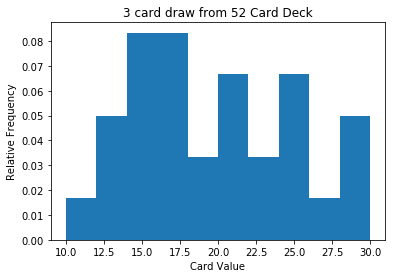

In [72]:
#Histogram of a 3 card draw from the 52 card deck x30
plt.figure(2)
plt.title("3 card draw from 52 Card Deck")
plt.xlabel("Card Value")
plt.ylabel("Relative Frequency")
plt.hist(df['sum'],normed=True);

Our histogram for drawing 3 cards looks normally distributed.

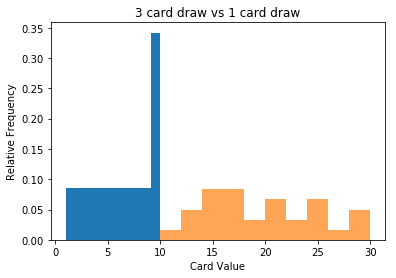

In [73]:
#Histogram of a 3 card draw from the 52 card deck x30
plt.figure(3)
plt.title("3 card draw vs 1 card draw")
plt.xlabel("Card Value")
plt.ylabel("Relative Frequency")
#first the single card draw plotted (the same as the deck)
plt.hist(cardval(deck),normed=True)
#then our 3 card draw on top
plt.hist(df['sum'],normed=True,alpha=0.7);

3 card draw represented in orange.
1 card draw represented in blue.

Our 1 card draw, which is the same as our population histogram is negatively skewed since there are four cards worth 10 versus number cards which have a unique value.

Our sum of 3 card draw is less skewed than our 1 card draw.

If we use the mean's of our 3 card draw, our histogram resembles a normal distribution as per the Central Limit Theorem (CLT) for sampling distributions.

**Q4. Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.**

If we keep taking more samples the resulting histogram of sums will look more like a normal distribution and we will approximate our response for a normal distribution.

For a range encompassing 90% of values from $-\infty \rightarrow z$
<br>We expect $z \approx 1.285$ via the Ztable.
<br>Using the formula $$z = \frac{x-\bar{x}}{SE}$$
We have $z = 1.285, \bar{x} = 19.53, SE = 5.69$

$$x \approx 26.84$$
<br>where SE = sample standard deviation = standard error

**We expect approximately 90% of sums drawn to be below 26.84.**

To draw a value of at least 20 we use our z-score formula we have $$z = \frac{x-\bar{x}}{SE}$$
$x = 20, \bar{x} = 19.53, SE = 5.69$
<br>$z \approx 0.0826$

From the Ztable we find z=0.0663 corresponds with around 0.5319.
<br>**We expect 53.19% of draws to sum to at least 20**